In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import nltk

In [7]:
df = pd.read_csv('Tweets.csv')

In [8]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [11]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [13]:
df.shape

(14640, 15)

In [14]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [15]:
location = df['tweet_location']

In [16]:
location

0                  NaN
1                  NaN
2            Lets Play
3                  NaN
4                  NaN
             ...      
14635              NaN
14636            Texas
14637    Nigeria,lagos
14638       New Jersey
14639       dallas, TX
Name: tweet_location, Length: 14640, dtype: object

In [17]:
is_new_jersy = df['tweet_location'] == 'New Jersey'

In [18]:
is_new_jersy

0        False
1        False
2        False
3        False
4        False
         ...  
14635    False
14636    False
14637    False
14638     True
14639    False
Name: tweet_location, Length: 14640, dtype: bool

In [19]:
is_new_jersy.tail()

14635    False
14636    False
14637    False
14638     True
14639    False
Name: tweet_location, dtype: bool

In [20]:
dfNew = df[is_new_jersy]
dfNew.shape

(29, 15)

In [21]:
dfNew

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
643,570232533272567813,negative,1.0000,Lost Luggage,1.0000,United,NaN,mortgagesbycoop,NaN,0,@united what time? Who can I call. I need my s...,NaN,2015-02-24 06:43:24 -0800,New Jersey,NaN
733,570114536448995328,negative,1.0000,Lost Luggage,0.3684,United,NaN,mortgagesbycoop,NaN,0,@united if I pay you $25 and $35 for my luggag...,NaN,2015-02-23 22:54:32 -0800,New Jersey,NaN
740,570106717490393088,negative,0.6632,Lost Luggage,0.6632,United,NaN,mortgagesbycoop,NaN,0,@united okay ase24766m. Find our luggage.,NaN,2015-02-23 22:23:28 -0800,New Jersey,NaN
746,570104913390206976,negative,1.0000,Lost Luggage,1.0000,United,NaN,mortgagesbycoop,NaN,1,"@united yes, but still now answers. Many have ...",NaN,2015-02-23 22:16:18 -0800,New Jersey,NaN
1200,569894828315533312,negative,1.0000,Late Flight,1.0000,United,NaN,ahpandya747,NaN,0,@united 3866 is at a stand still! No pilot or ...,NaN,2015-02-23 08:21:29 -0800,New Jersey,Eastern Time (US & Canada)
1252,569865540098871298,negative,1.0000,Late Flight,0.6947,United,NaN,JackKelleher920,NaN,0,@united We were supposed to board at 605. They...,NaN,2015-02-23 06:25:07 -0800,New Jersey,Eastern Time (US & Canada)
1310,569838973490765824,neutral,0.6495,NaN,NaN,United,NaN,idguy,NaN,0,@united Thanks. Got it straightend out last ni...,NaN,2015-02-23 04:39:33 -0800,New Jersey,Eastern Time (US & Canada)
1436,569721804891271168,negative,0.6500,Can't Tell,0.6500,United,NaN,jovytavarez,NaN,0,@united i need help but in spanish,NaN,2015-02-22 20:53:57 -0800,New Jersey,NaN
1459,569710365770182656,negative,0.6571,Can't Tell,0.3429,United,NaN,ssapol5722,NaN,0,@united is there nothing you can do for me? No...,NaN,2015-02-22 20:08:30 -0800,New Jersey,Quito
1504,569695452368670720,negative,1.0000,Cancelled Flight,1.0000,United,NaN,idguy,NaN,0,@united Why was flight 1180 EWR to MCO Cancell...,NaN,2015-02-22 19:09:14 -0800,New Jersey,Eastern Time (US & Canada)


In [38]:
token_word = dfNew['text']

In [ ]:
from collections import Counter
from nltk.corpus import stopwords

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [80]:
mycustomstopwords = ['can','I','have','you','hey','DM','@','359','6am','10:30',' @VirginAmerica']
notinuse = stopwords.words('english') + mycustomstopwords



In [90]:
df['text'] = df['text'].apply(lambda x: ''.join(word for word in x.split() if word not in(notinuse)))

In [91]:
df['text']

0                         @VirginAmericaWhat@dhepburnsaid.
1        @VirginAmericaplusaddedcommercialsexperience.....
2        @VirginAmericatoday...Mustmeanneedtakeanothert...
3        @VirginAmericareallyaggressiveblastobnoxious"e...
4                          @VirginAmericareallybigbadthing
                               ...                        
14635          @AmericanAirthankgotdifferentflightChicago.
14636    @AmericanAirleaving20minutesLateFlight.Nowarni...
14637    @AmericanAirPleasebringAmericanAirlines#BlackB...
14638    @AmericanAirmoney,changeflight,answerphones!An...
14639    @AmericanAir8pplneed2knowmanyseatsnextflight.P...
Name: text, Length: 14640, dtype: object

In [92]:
!pip install wordcloud


In [93]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [97]:
frequency_dist = nltk.FreqDist(tokens)

wordcloud = WordCloud( height=200,
    
    max_words=50,
    min_font_size=4,
   
    background_color='white',
    max_font_size=25,)

wordcloud.generate_from_frequencies(frequency_dist,max_font_size=100)



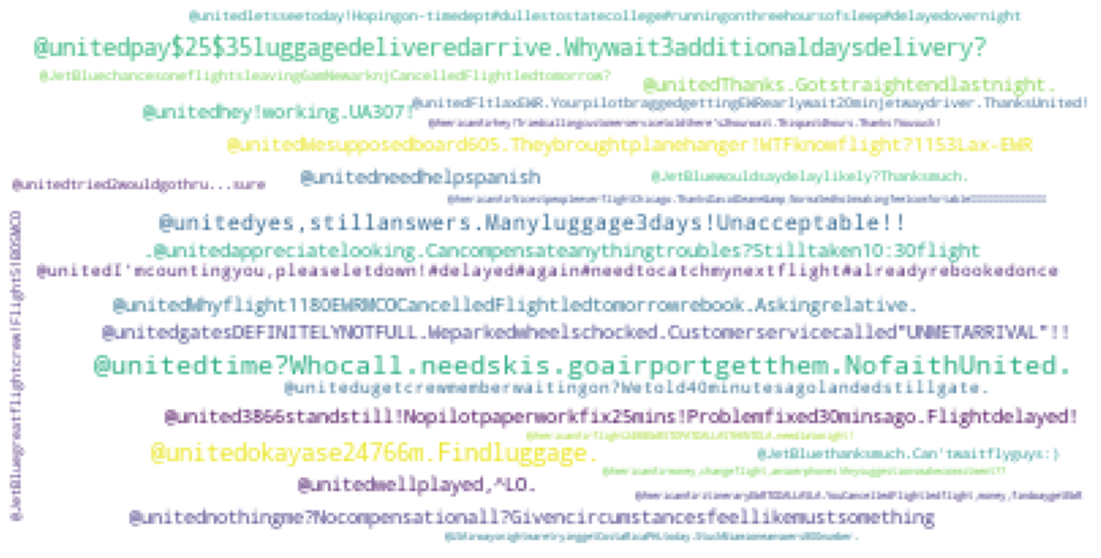

In [98]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()